In [1]:
import classify

In [2]:
import pickle
import os 

tmp = pickle.load(open(os.path.abspath('.'+'/kfo_hstlc/p2goodsnlc'),'rb'))

gnd12whe = tmp[57]
gnd12whe

time,band,flux,fluxerr,mag,magerr,zpsys,zp
float64,str7,float64,float64,float64,float64,str4,float64
56073.3,F160W,0.0,4.99,25.918,-9.0,VEGA,-inf
56124.5,F160W,9.542,1.746,25.051,0.198,VEGA,27.5
56145.5,F160W,9.779,1.555,25.024,0.172,VEGA,27.5
56183.1,F160W,0.0,4.918,25.934,-9.0,VEGA,-inf
56241.8,F160W,0.0,4.89,25.94,-9.0,VEGA,-inf
56073.3,F125W,0.0,2.602,26.574,-9.0,VEGA,-inf
56124.5,F125W,8.6,0.951,25.164,0.119,VEGA,27.5
56145.5,F125W,10.903,0.807,24.906,0.08,VEGA,27.5
56183.1,F125W,0.0,4.981,25.757,-9.0,VEGA,-inf


In [9]:
import sncosmo
import scipy
import scipy.interpolate
"""
Ran initial classify here for wheeler which returns dictionary of all
the different models {model name:sncosmo fit results} and pIa,pII,pIbc,logz values. 
also a {best model:model name} so is easy to access that best model fit
however the fit results have in them a prior fn which isn't able to be pickled...
I removed that in b so I can pickle it without the prior fn, classify takes a while to run.
"""
oIIspecz = 1.33
a = classify.classify(gnd12whe,zhost = 1.97,zhosterr= 0.2, zminmax=[1.1,2.2])

b={}
for k in a.keys():
    if isinstance(a[k],dict):
        b[k]={}
        for z in a[k].keys():
            if z!='priorfn':
                b[k][z]=a[k][z]
    else:
        b[k]=a[k]
        
pickle.dump(b,open('classify_gnd12whe.pkl','wb'))

In [3]:
readb=pickle.load(open('classify_gnd12whe.pkl','rb'))
#print(readb[readb['bestmodel']])

gnd12whe_bestmod = readb[readb['bestmodel']]
gnd12whe_bestmod_res = gnd12whe_bestmod['res']

  <z> =  1.75 +- 0.11
  <t0> =  56227.93 +- 19.73
  <amplitude> = 3.619e-17 +- 9.230e-18
  <hostebv> =  0.108 +- 0.071
  <hostr_v> =  2.99 +- 0.58


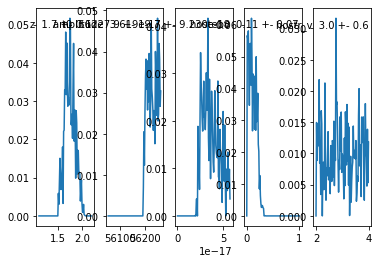

In [5]:
f = classify.plot_marginal_pdfs(gnd12whe_bestmod_res)

In [19]:
f.set_size_inches(10,10)

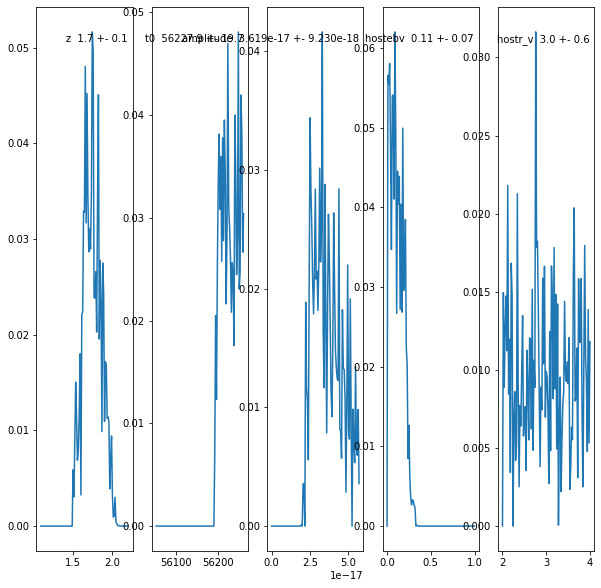

In [20]:
f

In [26]:
gnd12whe_bestmod['fit'].parameters

array([1.74552920e+00, 5.62279310e+04, 3.61856647e-17, 1.08440933e-01,
       2.98557438e+00])

In [27]:
gnd12whe_bestmod['fit'].

['z', 't0', 'amplitude', 'hostebv', 'hostr_v']